<a href="https://colab.research.google.com/github/AleEscalante/primeros_pasos_data_science/blob/main/desaf%C3%ADo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importación de datos
---

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/Inmersión de datos/inmuebles_bogota.csv')
datos_dane = pd.read_csv('/content/drive/MyDrive/Inmersión de datos/datos_dane.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Preparación de datos
---

##2.1 DataFrame inmuebles

In [ ]:
columnas = {'Baños':'Banos','Área':'Area'}

inmuebles = inmuebles.rename(columns=columnas)

valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

inmuebles['Descripcion'] = inmuebles['Descripcion'].str.strip()
inmuebles['Tipo'] = inmuebles['Tipo'].str.strip()
inmuebles['Barrio'] = inmuebles['Barrio'].str.strip()
inmuebles['UPZ'] = inmuebles['UPZ'].str.strip()

pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

inmuebles['Valor_m2_Millon'] = inmuebles['Precio_Millon']/inmuebles['Area'] 

datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']

m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])

inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.29


---
##2.2 DataFrame DANE

In [ ]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)

datos = datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados


,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
Venecia,0.47,0.82,0.24,0.29,0.50,0.36,2078712.71,0.83,0.14,0.40,0.25
Verbenal,0.77,0.56,0.08,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09


---
##2.3 Combinamos los DataFrame

In [ ]:
datos_ml = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

upz = pd.read_csv('//content/drive/MyDrive/Inmersión de datos/cod_upz.csv')
datos_ml = pd.merge(datos_ml,upz,left_on='UPZ',right_on='NOMBRE_ESTRATO', how='inner')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


---
#3. Modelado y análisis de datos

---



##3.1 Análisis y preparación de datos para el modelo

In [ ]:
datos_ml.shape

(9318, 26)

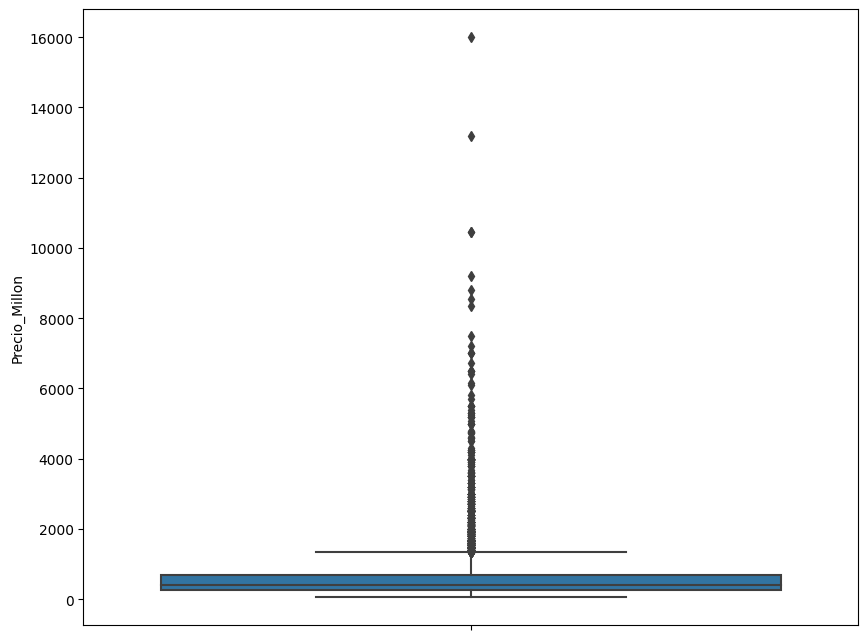

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

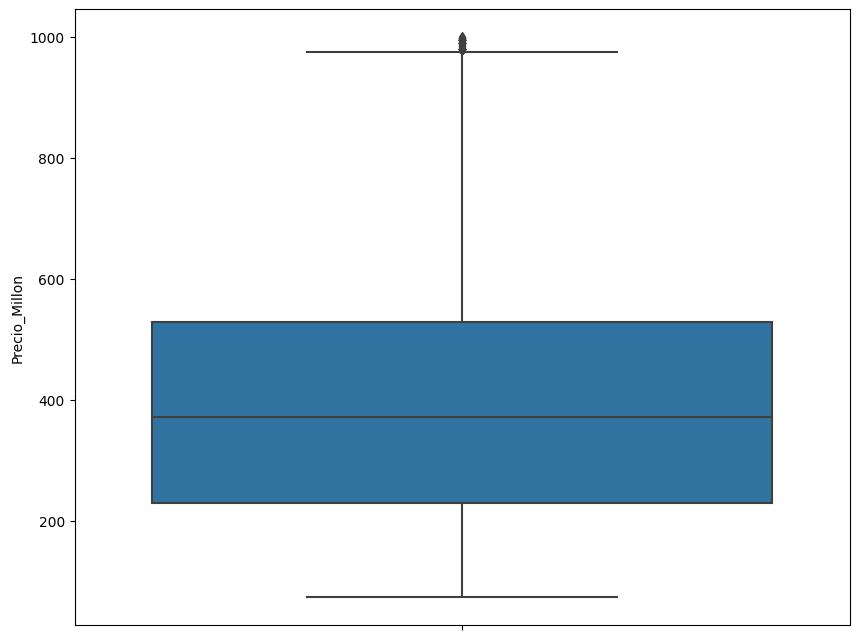

In [ ]:
datos_ml = datos_ml.query('Precio_Millon > 60 & Precio_Millon < 1000 ')
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = 'Precio_Millon')
plt.show()

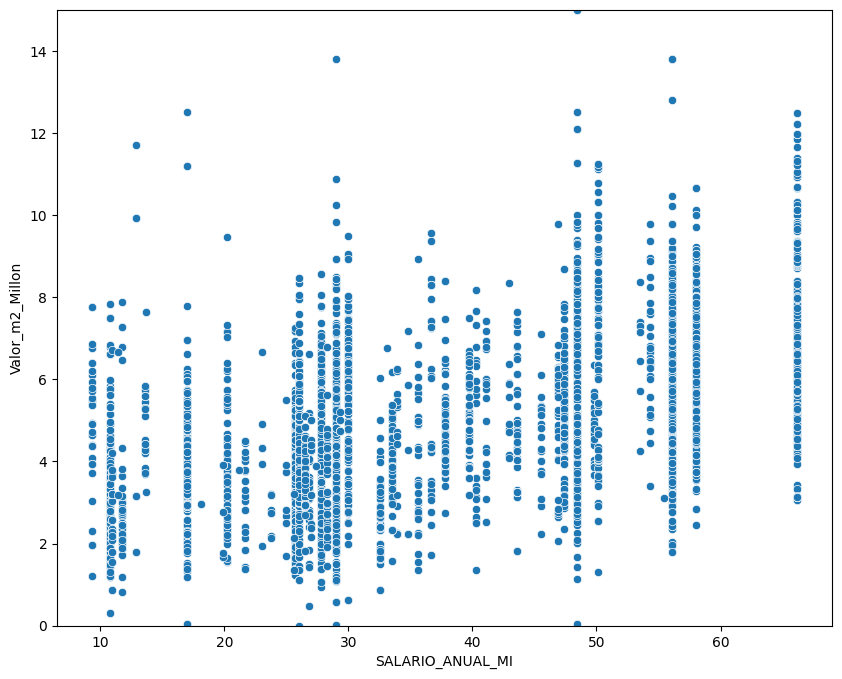

In [ ]:
datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000

plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI',y ='Valor_m2_Millon')
plt.ylim((0,15))
plt.show()

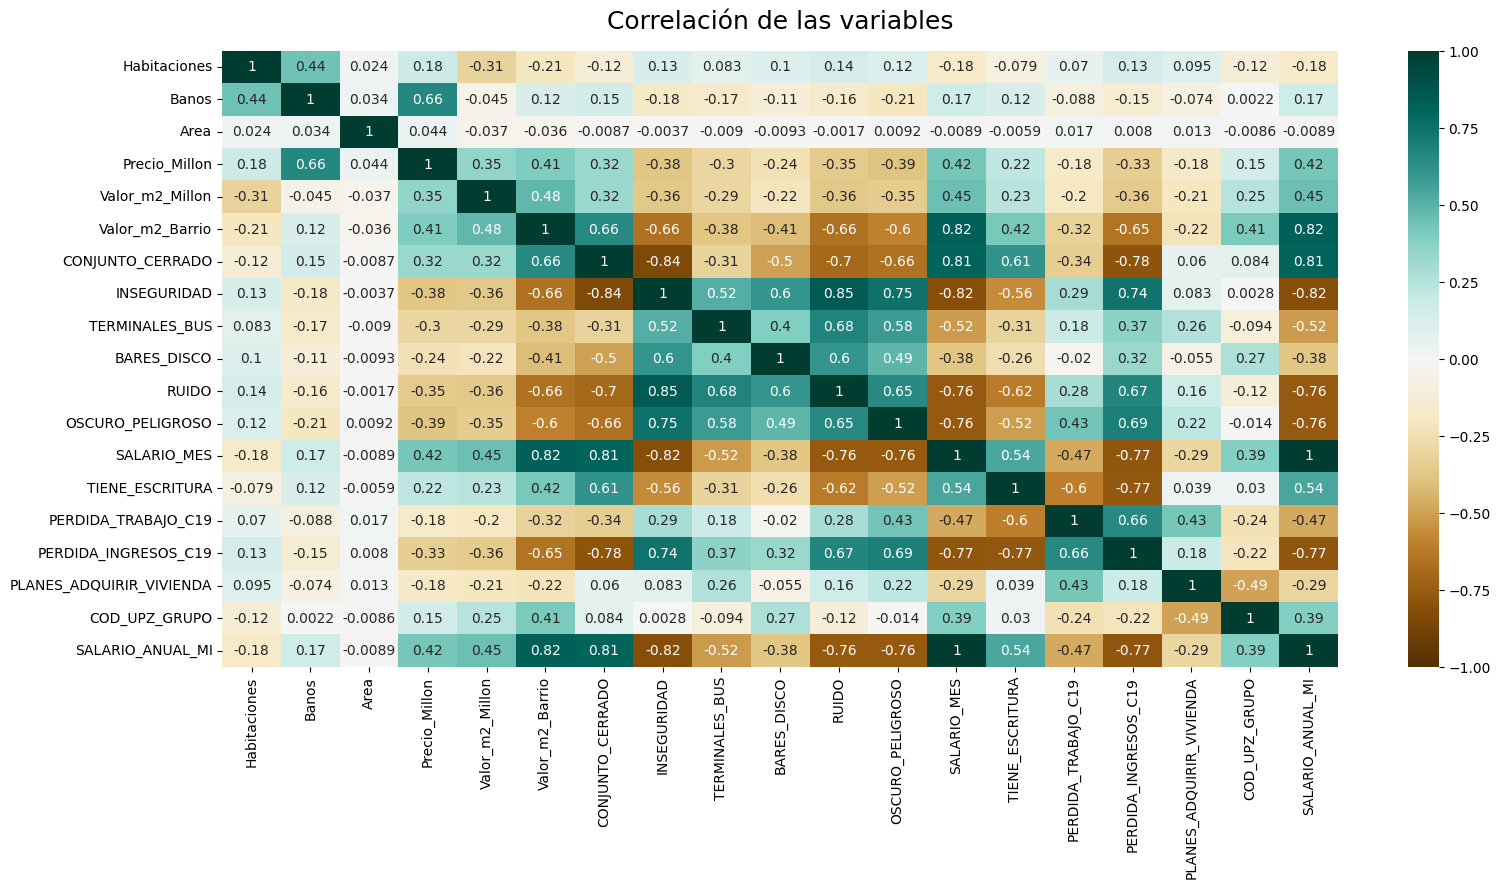

In [ ]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

In [ ]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8053 entries, 0 to 9317
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      8053 non-null   object 
 1   Descripcion               8053 non-null   object 
 2   Habitaciones              8053 non-null   int64  
 3   Banos                     8053 non-null   int64  
 4   Area                      8053 non-null   int64  
 5   Barrio                    8053 non-null   object 
 6   UPZ                       8053 non-null   object 
 7   Valor                     8053 non-null   object 
 8   Moneda                    8053 non-null   object 
 9   Precio                    8053 non-null   object 
 10  Precio_Millon             8053 non-null   float64
 11  Valor_m2_Millon           8053 non-null   float64
 12  Valor_m2_Barrio           8053 non-null   float64
 13  CONJUNTO_CERRADO          8053 non-null   float64
 14  INSEGURI

In [ ]:
datos_ml['Tipo'].unique()

array(['Apartamento', 'Casa', 'Local', 'Oficina/Consultorio', 'Bodega',
       'Finca', 'Edificio', 'Lote'], dtype=object)

Usaré Tipo en mi modelo, por lo cual voy a conseguir su equivalencia en código numérico para que el algortimo de ML trabaje con un conjunto de números y no combinaciones de tipos y poder escalar a una escala en común estos datos.

In [ ]:
Tipo_numerico = {'Apartamento': 0, 'Casa': 1, 'Local': 2, 'Oficina/Consultorio': 3, 'Bodega': 4, 'Finca': 5, 'Edificio': 6, 'Lote': 7}
datos_ml['Tipo_num'] = datos_ml['Tipo'].replace(Tipo_numerico)
datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO,SALARIO_ANUAL_MI,Tipo_num
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42,0
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42,1
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42,0
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,$,580000000,...,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42,1
10,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000,$,278000000,...,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34,0
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34,0
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34,0
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34,0


---
##3.2 Modelado de datos para aplicar algoritmo de ML

Probaré con un una regresión polinomica para ver si hay mejores resultados. A su vez, usaré datos generales sin una ubicación en específico para que la predicción sea aplicable a todo Bogotá.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = datos_ml[['Tipo_num','Habitaciones', 'Banos', 'Area', 'CONJUNTO_CERRADO', 'INSEGURIDAD', 'TERMINALES_BUS', 'BARES_DISCO', 'RUIDO',
              'OSCURO_PELIGROSO', 'SALARIO_ANUAL_MI']]
y = datos_ml['Precio_Millon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

escala = StandardScaler()
X_train_escalado = escala.fit_transform(X_train)
X_test_escalado = escala.transform(X_test)
                                 
polinomico = PolynomialFeatures(degree=2, include_bias=False)
X_train_polinomico = polinomico.fit_transform(X_train_escalado)
X_test_polinomico = polinomico.transform(X_test_escalado)

modelo = LinearRegression()
modelo.fit(X_train_polinomico, y_train)

LinearRegression()

In [ ]:
y_pred = modelo.predict(X_test_polinomico)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 1863463.4921696172
RMSE: 1365.0873569737641
R2: -37.86068276727485


* El valor de MSE = 1863463.49 indica que el modelo tiene un error cuadrático medio de aproximadamente 1.8 millones de pesos en la predicción del precio de las viviendas.
* El valor de RMSE = 1365.09 indica que el error promedio del modelo es de aproximadamente 1.3 millones de pesos.
* El valor de R2 = -37.86 indica que el modelo no se ajusta bien a los datos y es probable que esté sobreajustando.

Procederé a comparar con Lassi y Ridge, ambos son técnicas de regularización que se utilizan en modelos de regresión para reducir el sobreajuste y mejorar la capacidad de generalización.

Lasso se utiliza para la selección de variables y puede eliminar variables irrelevantes, mientras que Ridge se utiliza para reducir la varianza del modelo sin eliminar variables.

Aplicaré una cantidad moderada de regularización al modelo (alpha = 0.4)

In [ ]:
from sklearn.linear_model import Ridge, Lasso

X = datos_ml[['Tipo_num', 'Habitaciones', 'Banos', 'Area', 'CONJUNTO_CERRADO', 'INSEGURIDAD', 'TERMINALES_BUS', 'BARES_DISCO', 'RUIDO',
              'OSCURO_PELIGROSO', 'SALARIO_ANUAL_MI']]
y = datos_ml['Precio_Millon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

escala = StandardScaler()
X_train_escalado = escala.fit_transform(X_train)
X_test_escalado = escala.transform(X_test)

polinomico = PolynomialFeatures(degree=2, include_bias=False)
X_train_polinomico = polinomico.fit_transform(X_train_escalado)
X_test_polinomico = polinomico.transform(X_test_escalado)

modelo_ridge = Ridge(alpha=0.4)
modelo_ridge.fit(X_train_polinomico, y_train)

y_pred_ridge = modelo_ridge.predict(X_test_polinomico)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('\nRegresión Ridge:')
print(f'MSE: {mse_ridge}')
print(f'RMSE: {rmse_ridge}')
print(f'R2: {r2_ridge}')

modelo_lasso = Lasso(alpha=0.4)
modelo_lasso.fit(X_train_polinomico, y_train)

y_pred_lasso = modelo_lasso.predict(X_test_polinomico)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('\nRegresión LASSO:')
print(f'MSE: {mse_lasso}')
print(f'RMSE: {rmse_lasso}')
print(f'R2: {r2_lasso}')


Regresión Ridge:
MSE: 1149538.3244628254
RMSE: 1072.1652505387522
R2: -23.1000351985084

Regresión LASSO:
MSE: 827145.8127408645
RMSE: 909.4755701726488
R2: -16.341086223174734


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.305e+07, tolerance: 2.931e+04
  model = cd_fast.enet_coordinate_descent(


Hay una notoria mejora, pero sigue siendo bastante inadecuado el modelo de regresión propuesto por lo cual procederé a comparar la eficiencia de los modelos para elegir el mejor grado para mi regresión polinomica usando Lasso.

In [ ]:
X = datos_ml[['Tipo_num', 'Habitaciones', 'Banos', 'Area', 'CONJUNTO_CERRADO', 'INSEGURIDAD', 'TERMINALES_BUS','BARES_DISCO', 'RUIDO',
              'OSCURO_PELIGROSO', 'SALARIO_ANUAL_MI']]
y = datos_ml['Precio_Millon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

escala = StandardScaler()
X_train_escalado = escala.fit_transform(X_train)
X_test_escalado = escala.transform(X_test)

mse = {}
r2 = {}
for degree in range(1, 6):
    polinomico = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_polinomico = polinomico.fit_transform(X_train_escalado)
    X_test_polinomico = polinomico.transform(X_test_escalado)

    modelo = Lasso(alpha=0.4)
    modelo.fit(X_train_polinomico, y_train)

    y_pred = modelo.predict(X_test_polinomico)

    mse[degree] = mean_squared_error(y_test, y_pred)
    r2[degree] = r2_score(y_test, y_pred)

best_degree_mse = min(mse, key=mse.get)
print(f"Mejor grado (MSE): {best_degree_mse}")
print(f"MSE: {mse[best_degree_mse]}")
print(f"RMSE: {mse[best_degree_mse]**0.5}")
print(f"R2: {r2[best_degree_mse]}")

best_degree_r2 = max(r2, key=r2.get)
print(f"Mejor grado (R2): {best_degree_r2}")
print(f"MSE: {mse[best_degree_r2]}")
print(f"RMSE: {mse[best_degree_r2]**0.5}")
print(f"R2: {r2[best_degree_r2]}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.305e+07, tolerance: 2.931e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.414e+07, tolerance: 2.931e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.108e+07, tolerance: 2.931e+04

Mejor grado (MSE): 1
MSE: 22066.47740955804
RMSE: 148.5478960118858
R2: 0.5373769878216557
Mejor grado (R2): 1
MSE: 22066.47740955804
RMSE: 148.5478960118858
R2: 0.5373769878216557


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.959e+07, tolerance: 2.931e+04
  model = cd_fast.enet_coordinate_descent(


El mejor grado encontrado por la búsqueda de MSE y R2 es 1, y los valores de MSE, RMSE y R2 son iguales. Esto sugiere que un modelo lineal simple podría ser suficiente para el conjunto de datos, y que agregar características polinómicas no mejora significativamente el rendimiento del modelo.

In [ ]:
X = datos_ml[['Tipo_num', 'Habitaciones', 'Banos', 'Area', 'CONJUNTO_CERRADO', 'INSEGURIDAD', 'TERMINALES_BUS', 'BARES_DISCO', 'RUIDO',
              'OSCURO_PELIGROSO', 'SALARIO_ANUAL_MI']]
y = datos_ml['Precio_Millon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

escala = StandardScaler()
X_train_escalado = escala.fit_transform(X_train)
X_test_escalado = escala.transform(X_test)

modelo_lasso = Lasso(alpha=0.4)
modelo_lasso.fit(X_train_escalado, y_train)

y_pred_lasso = modelo_lasso.predict(X_test_escalado)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('\nRegresión LASSO:')
print(f'MSE: {mse_lasso}')
print(f'RMSE: {rmse_lasso}')
print(f'R2: {r2_lasso}')


Regresión LASSO:
MSE: 22066.477409558043
RMSE: 148.54789601188583
R2: 0.5373769878216557


---
##3.3 Predicción

Predicción para un inmueble con las siguientes características:
* Tipo de propiedad: Casa.
* Número de habitaciones: 3.
* Número de baños: 2.
* Área de la propiedad en metros cuadrados: 100.
* La propiedad está ubicada en un conjunto cerrado (1 si está en un conjunto cerrado, 0 si no lo está): 1.
* Hay inseguridad en el vecindario (1 si hay inseguridad, 0 si no la hay): 0.
* La propiedad está cerca a terminales de transporte público (1 si está cerca, 0 si no lo está): 1.
* Hay bares o discotecas cerca a la propiedad (1 si hay bares o discotecas cerca, 0 si no las hay): 1.
* Hay ruido en el vecindario (1 si hay ruido, 0 si no lo hay): 0.
* El vecindario es oscuro o peligroso (1 si es oscuro o peligroso, 0 si no lo es): 0.
* El salario anual promedio en millones de pesos colombianos de las personas que viven en el vecindario: 48.42

In [ ]:
modelo_lasso.predict([[1, 3, 2, 100, 1, 0, 1, 1, 0, 0, 48.42]])

array([4846.76194841])

Resultado: 4,846.76 millones de pesos colombianos o 1,043,616.00 dólares estadounidenses en promedio en Bogotá para un inmueble con estas características.